# SNPlentiful - correlations with number of SNPs per gene

In [1]:
import gzip

import pandas
import numpy
import matplotlib.pyplot
import seaborn

%matplotlib inline

In [2]:
# Read gene connectivity degrees
degree_df = pandas.read_table('data/gene-degrees.tsv.gz')
degree_df.head(2)

,entrez_gene_id,symbol,node,metaedge,degree
0,1,A1BG,gene::1,gene < overexpression downregulation < gene,0
1,1,A1BG,gene::1,gene - participation - molecular function,0


In [3]:
# Read SNPs per Gene on genotyping platforms
snp_count_df = pandas.read_table('data/platforms/combined.tsv')
snp_count_df = snp_count_df.iloc[:, 3:]
snp_count_df.head(2)

,entrez_gene_id,snps_hh550,snps_ho1,snps_affy500,snps_exac,snps_kg3
0,79501,0,0,0,4,10
1,148398,0,13,0,9,159


In [8]:
long_df = degree_df.merge(snp_count_df)
assert not any(long_df.duplicated(['entrez_gene_id', 'metaedge']))
for column in 'degree', 'snps_hh550', 'snps_ho1', 'snps_affy500', 'snps_exac', 'snps_kg3':
    long_df['{}_log'.format(column)] = numpy.log10(1 + long_df[column])
with gzip.open('data/combined.tsv.gz', 'wt') as write_file:
    long_df.to_csv(write_file, index=False, sep='\t', float_format='%.5g')
long_df.head(2)

,entrez_gene_id,symbol,node,metaedge,degree,snps_hh550,snps_ho1,snps_affy500,snps_exac,snps_kg3,degree_log,snps_hh550_log,snps_ho1_log,snps_affy500_log,snps_exac_log,snps_kg3_log
0,1,A1BG,gene::1,gene < overexpression downregulation < gene,0,4,12,1,6,38,0,0.69897,1.113943,0.30103,0.845098,1.591065
1,1,A1BG,gene::1,gene - participation - molecular function,0,4,12,1,6,38,0,0.69897,1.113943,0.30103,0.845098,1.591065


## Visualization

In [5]:
long_df = pandas.read_table('data/combined.tsv.gz')

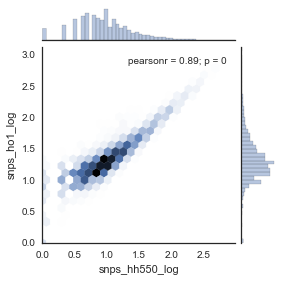

In [6]:
with seaborn.axes_style('white'):
    grid = seaborn.jointplot(x='snps_hh550_log', y='snps_ho1_log', data=long_df, kind='hex', gridsize=25, size=4)

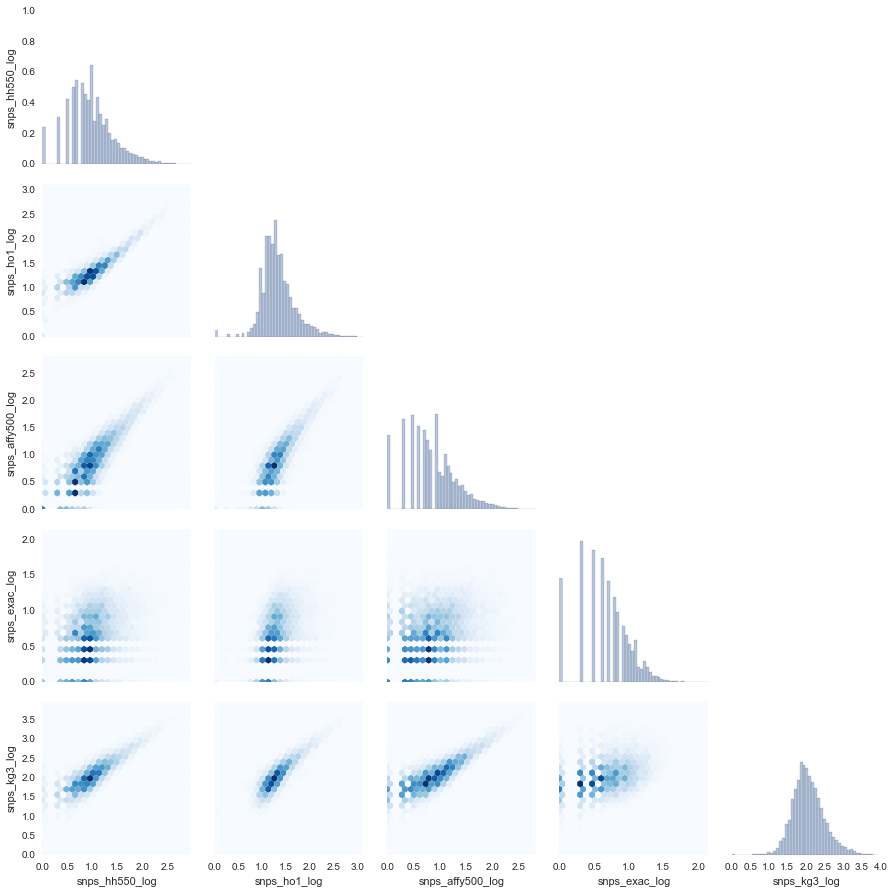

In [7]:
plot_df = long_df.dropna().drop_duplicates('entrez_gene_id')
seaborn.set_style('white')
grid = seaborn.PairGrid(plot_df, vars=['snps_hh550_log', 'snps_ho1_log', 'snps_affy500_log', 'snps_exac_log', 'snps_kg3_log'])
grid.map_diag(seaborn.distplot, kde=False)
grid.map_lower(matplotlib.pyplot.hexbin, cmap='Blues', gridsize=25, linewidths=0)
seaborn.despine(top=True, right=True, left=True, bottom=True)